In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import empiricaldist as emp
import numpy as np



In [16]:
#Carregar o arquivo ja limpo e tratado anteriormente

transfer = pd.read_csv('Arquivo-Transferencias-Organizado.csv')

# Visualizar o arquivo

transfer = transfer.drop(columns='Unnamed: 0')
transfer.sample(n=5)
transfer[transfer['Position'] == 'Right Winger'].head(20)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee;
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000,60000000
13,Antonio Guayre,Right Winger,21,UD Las Palmas,LaLiga,Villarreal CF,LaLiga,2001,6000000
21,Valdo,Right Winger,22,Real Madrid,LaLiga,CA Osasuna,LaLiga,2003,1800000
32,Luciano Galletti,Right Winger,25,Real Zaragoza,LaLiga,Atlético Madrid,LaLiga,2005,2500000
35,Joaquín,Right Winger,25,Real Betis,LaLiga,Valencia CF,LaLiga,2006,25000000
74,Pedro León,Right Winger,22,Real Valladolid,LaLiga,Getafe CF,LaLiga,2009,4000000
79,Pedro León,Right Winger,23,Getafe CF,LaLiga,Real Madrid,LaLiga,2010,10000000
91,José Callejón,Right Winger,24,Espanyol,LaLiga,Real Madrid,LaLiga,2011,5000000
94,Joaquín,Right Winger,29,Valencia CF,LaLiga,Málaga CF,LaLiga,2011,4200000
95,José Antonio Reyes,Right Winger,28,Atlético Madrid,LaLiga,Sevilla FC,LaLiga,2011,3500000


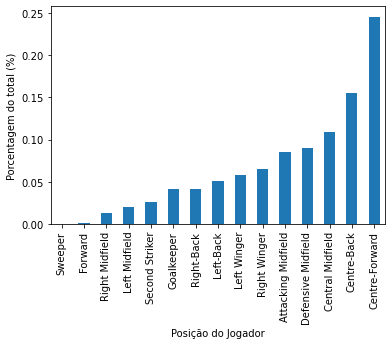

<Figure size 2880x3600 with 0 Axes>

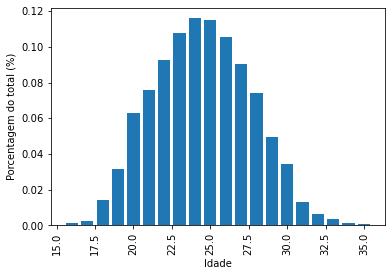

In [17]:
#Vamos comecar a explorar os dados comecando pela distribuicao dos registros de posicao

pmf_position = emp.Pmf.from_seq(transfer['Position'], normalize = True)
pmf_position.sort_values().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.xlabel('Posição do Jogador')
plt.ylabel('Porcentagem do total (%)')
plt.figure(figsize=(40,50)) 
plt.show()

# Vamos olhar como se comporta a frequencia de transferencia por idade

cdf_age = emp.Pmf.from_seq(transfer['Age'], normalize = True)
cdf_age.bar()
plt.xticks(rotation = 90)
plt.xlabel('Idade')
plt.ylabel('Porcentagem do total (%)')
plt.show()




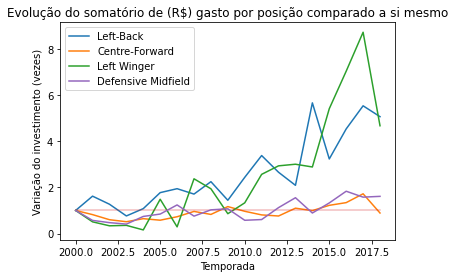

76    1.000000
77    0.569183
78    0.472074
79    0.408588
80    0.740893
81    0.843671
82    1.239405
83    0.754140
84    1.026382
85    1.071569
86    0.574572
87    0.606118
88    1.122930
89    1.551502
90    0.889138
91    1.325568
92    1.832725
93    1.576761
94    1.611002
Name: Transfer_fee;, dtype: float64

In [18]:

# Vamos agrupar por posicao e por tempoarada afim de ver como mudou o comportamento das maiores transferencias (Posicao)
agrupado_contagem_posicao = transfer.groupby(['Position','Season'])['Transfer_fee;'].count()

agrupado_soma_valor_posicao = transfer.groupby(['Position','Season'])['Transfer_fee;'].sum()


grouped_cnt_pos = pd.DataFrame(agrupado_contagem_posicao)
grouped_cnt_pos = grouped_cnt_pos.reset_index()

grouped_sum_pos = pd.DataFrame(agrupado_soma_valor_posicao)
grouped_sum_pos = grouped_sum_pos.reset_index()

#Criando mascaras para realizar o primeiro grafico como se comportou o somatorio (R$) de jogadores vendidos por posiçoes mais importantes ao longo das temporadas

mask1 = grouped_sum_pos[grouped_sum_pos['Position'] == 'Left-Back']
mask2 = grouped_sum_pos[grouped_sum_pos['Position'] == 'Centre-Forward']
mask3 = grouped_sum_pos[grouped_sum_pos['Position'] == 'Left Winger']
mask4 = grouped_sum_pos[grouped_sum_pos['Position'] == 'Defensive Midfield']

#Normalizando os dados para que fiquem mais faceis de serem visualizados

norm1 = np.array(mask1['Transfer_fee;'][:1])
norm2 = np.array(mask2['Transfer_fee;'][:1])
norm3 = np.array(mask3['Transfer_fee;'][:1])
norm4 = np.array(mask4['Transfer_fee;'][:1])

#Colocando os dados normalizados em uma variavel 

arg1 = (mask1['Transfer_fee;']/(norm1))
arg2 = (mask2['Transfer_fee;']/(norm2))
arg3 = (mask3['Transfer_fee;']/(norm3))
arg4 = (mask4['Transfer_fee;']/(norm4))

#Criando uma linha de referencia para ser plotada no grafico 

zero = []
zero = np.linspace(1,1,19)

#Plotando o grafico

plt.plot( np.arange(2000,2019),arg1, label = 'Left-Back')
plt.plot(np.arange(2000,2019), arg2 ,label = 'Centre-Forward')
plt.plot(np.arange(2000,2019), arg3 ,label = 'Left Winger')
plt.plot(np.arange(2000,2019), zero, alpha = 0.30)
plt.plot(np.arange(2000,2019), arg4, label = 'Defensive Midfield')
plt.xlabel('Temporada')
plt.ylabel('Variação do investimento (vezes)')
plt.title('Evolução do somatório de (R$) gasto por posição comparado a si mesmo')
plt.legend(loc='upper left')
plt.show()


#Verificando se o grafico e dados sao condizentes

arg4.head(20)



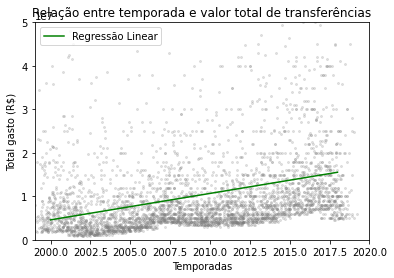

608167.2073668261

In [19]:
# A seguir analisaremos relacoes entre variaveis

# Plotaremos a relacao entre temporada e valor de transferencia

temporada = transfer['Season']


# Criando ruido na amostra de temporada para que os dados nao fiquem plotados de maneira segmentada e plotando a relacao 
 
temporada_mod = temporada + np.random.normal(0,0.5, size = len(transfer['Season']))
plt.plot(temporada_mod, valor, 'o', alpha = 0.2, markersize = 2, color = 'gray')
plt.axis([1999,2020,0,50000000])

# Faremos uma regressao linear entre Temporada e valor de transferencias com o objetivo de analisar o comportamento de uma variavel em relacao a outra

from scipy.stats import linregress

subset = transfer.dropna( subset = ['Transfer_fee;','Season'])

xs = subset['Season']
ys = subset['Transfer_fee;']

res = linregress(xs,ys)

# Vamos plotar para que fique mais visual

fx = np.array([xs.min(), xs.max()])
fy = res.slope*fx + res.intercept

plt.plot(fx,fy,'-', color= 'green', label ='Regressão Linear')
plt.title('Relação entre temporada e valor total de transferências')
plt.xlabel('Temporadas')
plt.ylabel( 'Total gasto (R$)')
plt.legend(loc = 'upper left')
plt.show()

# Identificando numericamente a inclinacao da reta

res.slope





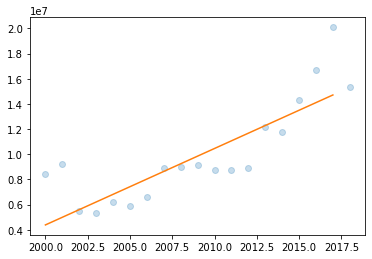

Intercept   -1.208659e+09
Age         -3.734039e+04
Season       6.070834e+05
dtype: float64

In [20]:
# Atraves de uma regressao multipla tentaremos encontrar uma distribuicao que melhor se encaixe numa tentativa de inferir valores de transferencia

import statsmodels.formula.api as smf

#Mudar nome da coluna de transfer fee por conta do caractere especial

transfer = transfer.rename(columns={'Transfer_fee;':'Valor_transferencia'})



# Vamos tentar estimar o valor de transferencia para diferentes temporadas matendo a idade constante

# Criando um dataframe com o tamanho da amostra de temporadas que queremos e com a idade do jogador constante
df = pd.DataFrame()

df['Season'] = np.arange(2000,2018)
df['Season2'] = df['Season']**1
transfer['Season2'] = df['Season']**1

df['Age'] = 30
df['Age3'] = df['Age']**1
transfer['Age3'] = df['Age']**1


#Aplicando a tecnica de regressao multipla

result = smf.ols('Valor_transferencia ~ Age + Season', data = transfer).fit()

pred1 = result.predict(df)

pred1.head(10)
df['Season'] = np.arange(2000,2018)
pred2 = result.predict(df)

# agora vamos comparar o predict com uma media


grouped = transfer.groupby('Season')
mean = grouped['Valor_transferencia'].mean()

plt.plot(mean, 'o',alpha = 0.25)
plt.plot(df['Season'], pred1, label = 'Age 25')




plt.show()

result.params

